<a href="https://colab.research.google.com/github/franciscosesto/Bank-churn-prediction/blob/main/Bank_customer_prediction_BIG_DATA_AUSTRAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Prediction**

## 🎈 **Introducción**

**Introducción:** <br>
El conjunto de datos de churn de clientes bancarios es una recopilación de información que se utiliza comúnmente para predecir la tasa de abandono de clientes en la industria bancaria. Estos datos son fundamentales para comprender los factores que influyen en la pérdida de clientes en un banco, lo que permite a las instituciones financieras tomar medidas para retener a sus clientes existentes.
<br><br>

**Audiencia a la que está dirigido:** <br>
Este conjunto de datos está dirigido principalmente a profesionales y analistas de la industria bancaria que están interesados en comprender y predecir el comportamiento de sus clientes. También puede ser de interés para investigadores y académicos que se centran en el análisis de datos y la gestión de la relación con los clientes en el sector bancario.
<br><br>

**Temática:** <br>
La temática principal de este conjunto de datos es la predicción de la tasa de abandono de clientes en el sector bancario. A través de los atributos proporcionados, como el puntaje de crédito, la edad, el saldo de la cuenta y otros factores relevantes, se busca identificar patrones y tendencias que puedan indicar la probabilidad de que un cliente abandone el banco.
<br><br>

**Participantes:** <br>
Los participantes en este conjunto de datos son los clientes bancarios que han sido seleccionados como sujetos de estudio. Se recopila información sobre su perfil demográfico, historial crediticio, comportamiento de uso de productos y su estado actual de relación con el banco (si han abandonado o siguen siendo clientes).
<br><br>

**Metodología:** <br>
La metodología utilizada para recopilar estos datos puede variar, pero generalmente implica la extracción de información de las bases de datos internas del banco, donde se almacenan los detalles de los clientes y sus transacciones. Los datos pueden haber sido anonimizados y procesados para proteger la privacidad de los clientes. Posteriormente, se realizan análisis estadísticos y modelos predictivos para identificar patrones y relaciones entre las variables que ayuden a predecir el churn de los clientes.
<br><br>



## 👓 **Metadata**

Las variables son
* **Customer ID:** Identificador único para cada cliente.
* **Surname:** Apellido del cliente.
* **Credit Score**: Valor numérico que representa el puntaje de crédito del cliente.
* **Geography:** País donde reside el cliente (Francia, España o Alemania).
* **Gender:** Género del cliente (Masculino o Femenino).
* **Age:** Edad del cliente.
* **Tenure:** Número de años que el cliente ha estado en el banco.
* **Balance:** Saldo de la cuenta del cliente.
* **NumOfProducts**: Número de productos bancarios que utiliza el cliente (por ejemplo, cuenta de ahorros, tarjeta de crédito).
* **HasCrCard:** Indica si el cliente tiene una tarjeta de crédito (1 = sí, 0 = no).
* **IsActiveMember:** Indica si el cliente es miembro activo (1 = sí, 0 = no).
* **EstimatedSalary:** Salario estimado del cliente.
* **Exited:** Indica si el cliente ha abandonado (1 = sí, 0 = no).

## 🧹 **Preparación de los datos**

***Importaciones de librerias***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import sys
import joblib
import missingno as mn
import warnings
warnings.filterwarnings("ignore")
sys.modules['sklearn.externals.joblib'] = joblib

***Cargando los datos al notebook***

In [2]:
import pandas as pd

# De ahora en más nos refderiremos al dataset de caracterísitcas del consumidor como "df"
df= pd.read_csv("https://raw.githubusercontent.com/franciscosesto/BigDataAustral/main/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


***Forma de los datos***

In [3]:
# Imprimo la forma de los datos y las primeras 5 fila
print("shape of the data :",df.shape)
print('**'*50)
df.head()

shape of the data : (10002, 14)
****************************************************************************************************


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


***Información general sobre los datos***

In [4]:
# Imprimo la información de cada columna de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [5]:
# Chequeo la distribución de los datos de las columnas
df.agg(["min","mean","max"]).T

,min,mean,max
RowNumber,1.0,5001.4996,10000.0
CustomerId,15565701.0,15690933.45011,15815690.0
Surname,Abazu,NaN,Zuyeva
CreditScore,350.0,650.555089,850.0
Gender,Female,NaN,Male
Age,18.0,38.922311,92.0
Tenure,0.0,5.012498,10.0
Balance,0.0,76491.112875,250898.09
NumOfProducts,1.0,1.530194,4.0
HasCrCard,0.0,0.705529,1.0


## 🔨 **Data Wrangling**

***Eliminando columna de filas***

In [6]:
#Elimino RowNumber porque ya existe una de filas y sería repetitivo
del df["RowNumber"]

***Chequeando valores nulos***

In [7]:
#Chequeando cuáles son las columnas con valores nulos
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

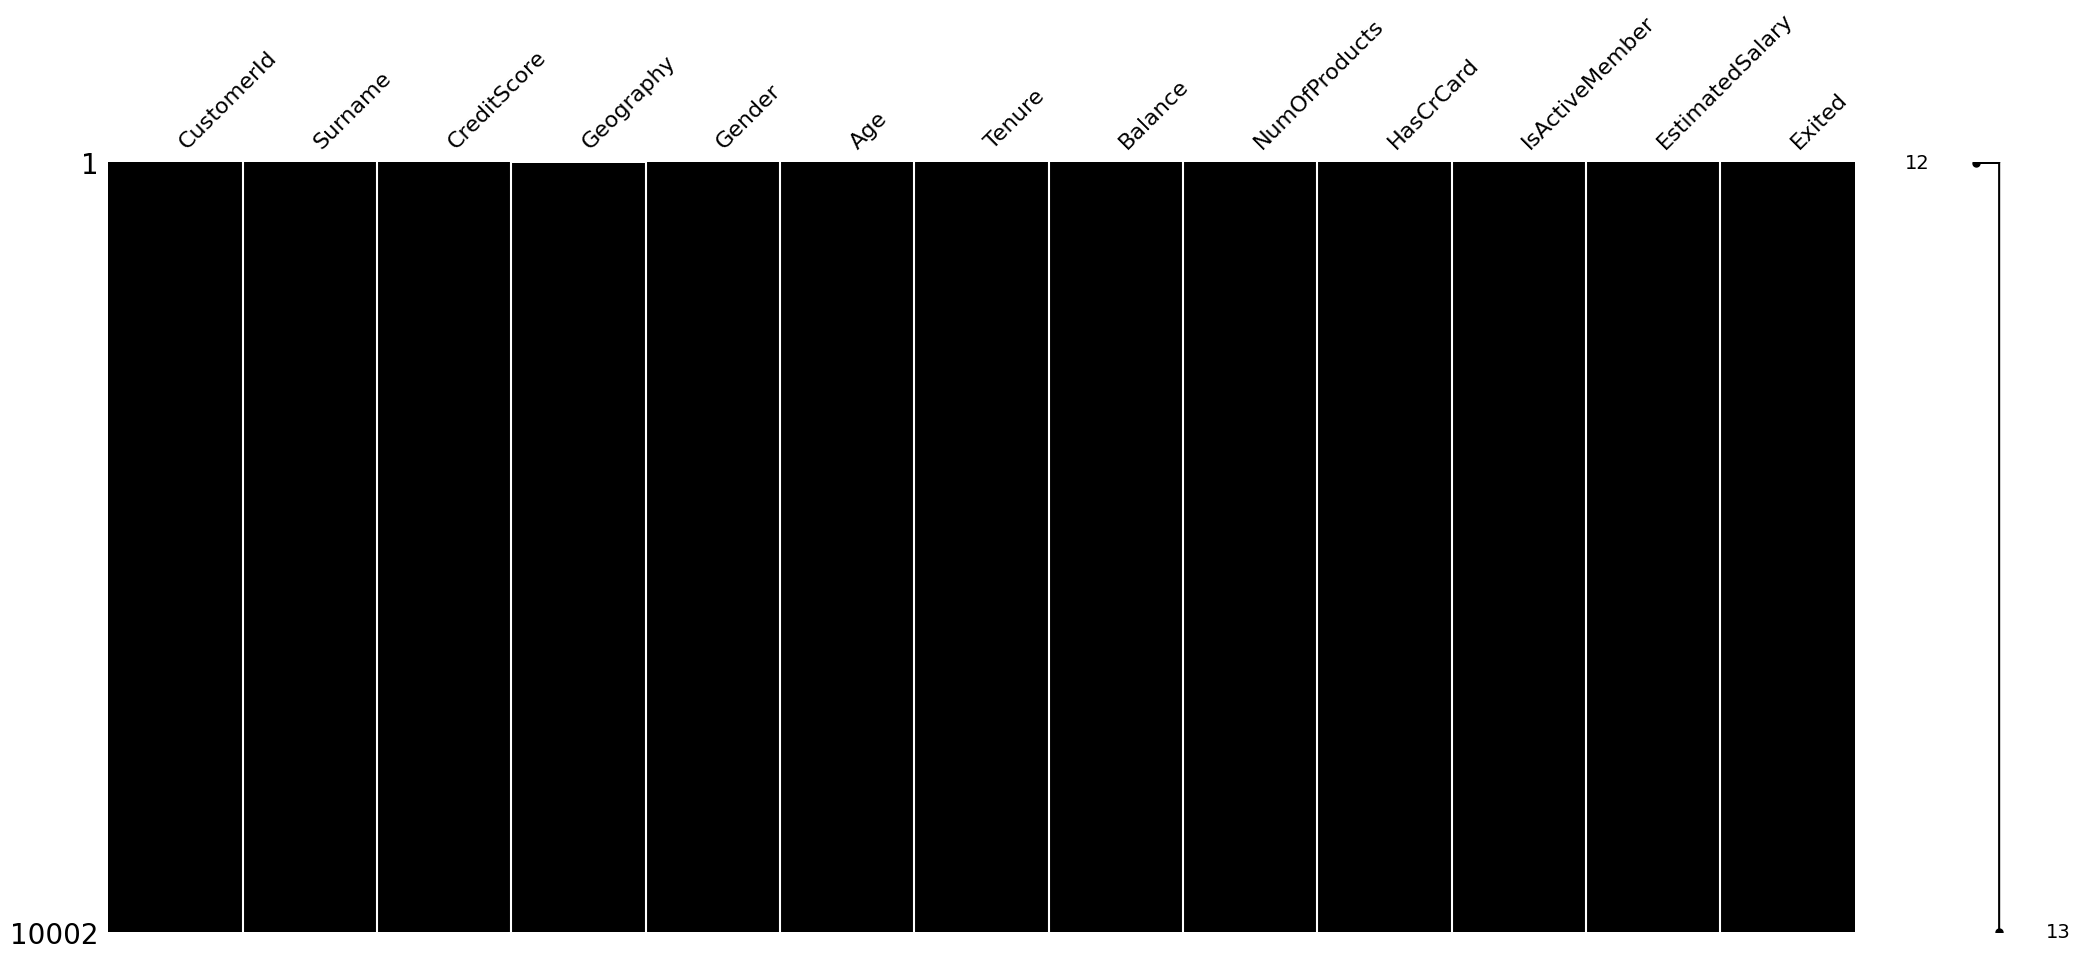

In [8]:
#Visualizando los valores nulos
mn.matrix(df,color = (0,0,0))

In [9]:
#Eliminando los valores nulos de las columnas
df = df.dropna()

***Chequeando si existe algún NAN***

In [10]:
#comprobando si hay algún NAN en las columnas
df.isna().any()

CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

***Chequeando duplicados***

In [11]:
#Chequeando si existe duplicados
df[df.duplicated()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10001,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [12]:
#Eliminando duplicados
df = df.drop_duplicates()

***Creando una variable dummie de gender***

In [13]:
#Creando variable dummie de género
dgender = pd.get_dummies(df["Gender"],prefix="gender")
dgender

,gender_Female,gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
5,0,1
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [14]:
#Agregándola al df
df=pd.concat([df, dgender["gender_Male"]], axis=1)

***Creando una variable dummie de geography***

In [15]:
#Creando variable dummie de país
dgeography = pd.get_dummies(df["Geography"],prefix="geography")
dgeography

,geography_France,geography_Germany,geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
5,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [16]:
#Agregándola al df
df=pd.concat([df, dgeography], axis=1)

***Clasificar columna de edad del cliente***

In [17]:
#Agrego una variable cualitativa relacionada con la edad que
#nos permita fácilmente visualizar los diferentes grupos

def clasificaredad(e):
  if e<30:
    return "Joven Adulto"
  elif e<45:
    return "Adulto"
  elif e<60:
    return "Adulto mayor"
  else:
    return "Mayor"

df["Agerange"]=[clasificaredad(x) for x in df["Age"]]

## 📊 **Exploratory data analysis**


### ➖ Matplotlib gráficos

#### 🔸 Churn by gender Pie Chart
Este gráfico de torta nos muestra el porcentaje de los clientes que han abandonado, según su género. Podemos ver que a priori hay una mayor cantidad de mujeres que abandonan.


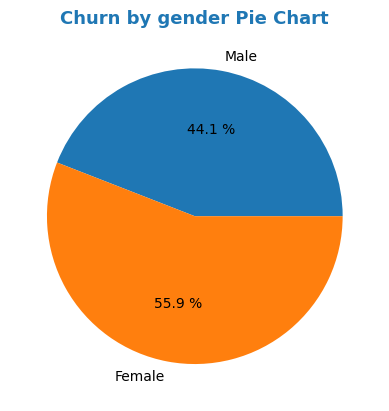

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import operator

# Obtener los valores de abandono por género
gender_labels = set(df["Gender"]) # Obtener los valores únicos de género en el DataFrame
exited_values_gender = [df.groupby("Gender").get_group(group)["Exited"].sum() for group in gender_labels] # Calcular la suma del campo "Exited" para cada grupo de género
exited_by_gender = {i: j for i, j in zip(gender_labels, exited_values_gender)} # Crear un diccionario que relaciona cada género con su valor de abandono
sortedDict = dict(sorted(exited_by_gender.items(), key=operator.itemgetter(1))) # Ordenar el diccionario por los valores de abandono

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots()

# Graficar el pie chart con los valores de abandono por género
ax.pie(exited_by_gender.values(), labels=exited_by_gender.keys(), autopct="%0.1f %%")

# Configurar el título del gráfico
ax.set_title('Churn by gender Pie Chart', loc="center", fontdict={'fontsize': 13, 'fontweight': 'bold', 'color': 'tab:blue'})

# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Churn_by_gender_Pie_Chart.jpg")

# Mostrar el gráfico
plt.show()

#### 🔸 Churn by country Bar Chart
Este gráfico de barras nos muestra la propensión a abandonar por país de residencia. Podemos ver que los clientes de Alemania son los que más abandonan.


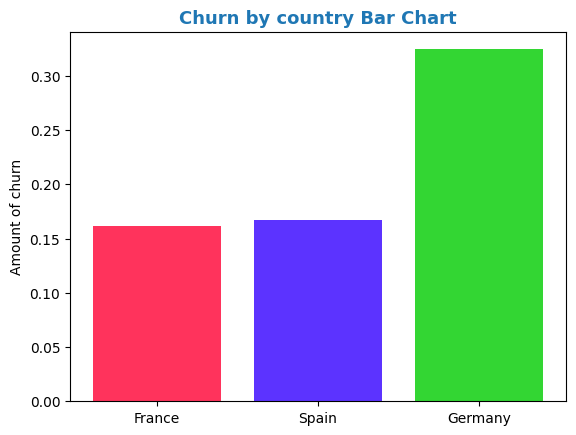

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import operator

# Obtener los valores de abandono por país
country_labels = set(df["Geography"])  # Obtener los valores únicos de la columna "Geography"
exited_values_country = [df.groupby("Geography").get_group(group)["Exited"].sum() / df.groupby("Geography").get_group(group)["Exited"].count() for group in country_labels] # Calcular el porcentaje de churn por país
exited_by_country = {i: j for i, j in zip(country_labels, exited_values_country)} # Crear un diccionario donde las claves son los países y los valores son los porcentajes de churn
sortedDict = dict(sorted(exited_by_country.items(), key=operator.itemgetter(1))) # Ordenar el diccionario de forma ascendente por los valores de churn

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots()

# Graficar las barras del gráfico de barras con los países en el eje x y los porcentajes de churn en el eje y
ax.bar(sortedDict.keys(), sortedDict.values(), color=[(1, 0, 0.2, 0.8), (0.2, 0, 1, 0.8), (0, 0.8, 0, 0.8)])

# Establecer etiqueta del eje y título
ax.set_ylabel("Amount of churn")
ax.set_title('Churn by country Bar Chart', loc="center", fontdict={'fontsize': 13, 'fontweight': 'bold', 'color': 'tab:blue'})

# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Churn_by_country_Bar_Chart.jpg")

# Mostrar el gráfico
plt.show()

#### 🔸 Churn by active member Bar Chart
Este gráfico de barras nos muestra la propensión a abandonar según si son miembros activos o no. Podemos ver que los clientes que no son activos son los que más abandonan.


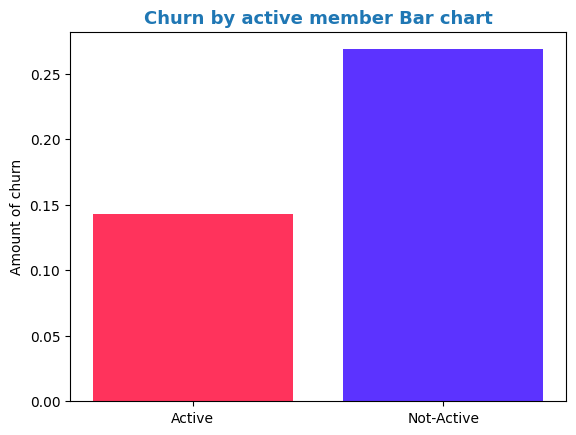

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los valores de abandono por la actividad del miembro
active_labels = set(df["IsActiveMember"])  # Buscar los valores únicos de la columna "IsActiveMember"
exited_values_active = [df.groupby("IsActiveMember").get_group(group)["Exited"].sum() / df.groupby("IsActiveMember").get_group(group)["Exited"].count() for group in active_labels] # Calcular el porcentaje de churn por estado de miembro activo
exited_by_active = {i: j for i, j in zip(active_labels, exited_values_active)} # Crear un diccionario donde las claves son los estados de miembro activo y los valores son los porcentajes de churn
dict_active = {"Active": exited_by_active[1], "Not-Active": exited_by_active[0]} # Crear un diccionario con nombres más descriptivos para los estados de miembro activo

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots()

# Graficar las barras del gráfico de barras con los estados de miembro activo en el eje x y los porcentajes de churn en el eje y
ax.bar(dict_active.keys(), dict_active.values(), color=[(1, 0, 0.2, 0.8), (0.2, 0, 1, 0.8)])

# Establecer etiqueta del eje y título
ax.set_ylabel("Amount of churn")
ax.set_title('Churn by active member Bar chart', loc="center", fontdict={'fontsize': 13, 'fontweight': 'bold', 'color': 'tab:blue'})

# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Churn_by_active_member_Bar_chart.jpg")

# Mostrar el gráfico
plt.show()

#### 🔸 Churn by number of products Bar Chart
Este gráfico de barras nos muestra la propensión a abandonar por número de productos. Podemos ver que los clientes que tienen 4 productos son los que más abandonan.


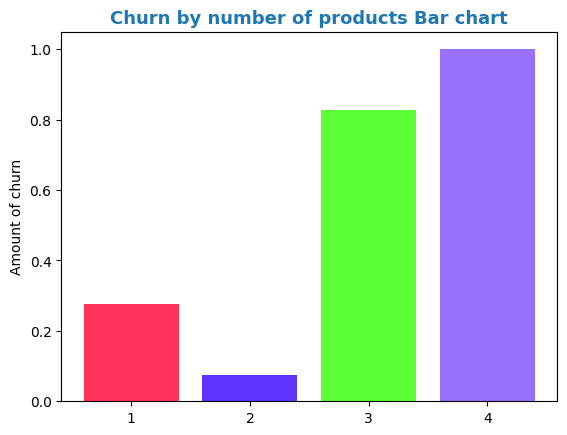

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los valores de abandono por número de productos
num_labels = set(df["NumOfProducts"])  # Buscar los valores únicos de la columna "NumofProducts"
exited_values_num = [df.groupby("NumOfProducts").get_group(group)["Exited"].sum() / df.groupby("NumOfProducts").get_group(group)["Exited"].count() for group in num_labels] # Calcular el porcentaje de churn por número de productos
exited_by_num = {i: j for i, j in zip(num_labels, exited_values_num)} # Crear un diccionario donde las claves son los números de productosy los valores son los porcentajes de churn
dict_num = {"1": exited_by_num[1], "2": exited_by_num[2],"3": exited_by_num[3], "4": exited_by_num[4]} # Crear un diccionario con nombres más descriptivos para los números de producto

# Crear una figura y un objeto de ejes
fig, ax = plt.subplots()

# Graficar las barras del gráfico de barras con los estados de miembro activo en el eje x y los porcentajes de churn en el eje y
ax.bar(dict_num.keys(), dict_num.values(), color=[(1, 0, 0.2, 0.8), (0.2, 0, 1, 0.8), (0.2, 1, 0, 0.8), (0.5, 0.3, 1, 0.8)])

# Establecer etiqueta del eje y título
ax.set_ylabel("Amount of churn")
ax.set_title('Churn by number of products Bar chart', loc="center", fontdict={'fontsize': 13, 'fontweight': 'bold', 'color': 'tab:blue'})

# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Churn_by_number_of_products_Bar_chart.jpg")

# Mostrar el gráfico
plt.show()

### ➖ Seaborn gráficos

#### 🔸 Age and churn Histogram
En el histograma de edad podemos visualizar la distribución, las frecuencias de edades y ver qué edades son más recurrentes en los clientes que otras. En este gráfico podemos ver una gran concentración en las edades de 30 a 45, por lo cual sabemos que la mayoría es gente adulta. Se puede ver en este caso que las edades que más abandonan se encuentran entre 40 a 50 lo que llamamos adultos y adultos mayores.

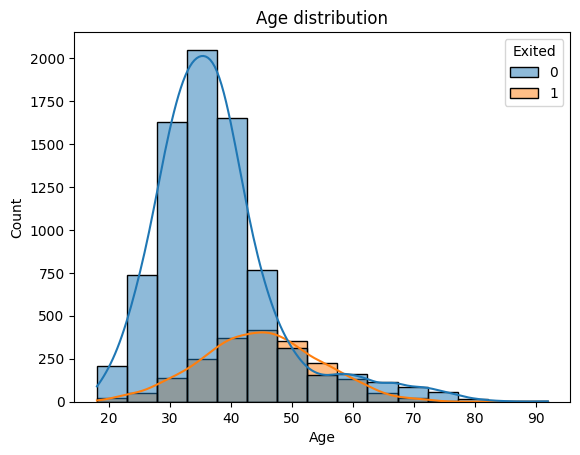

In [22]:
import seaborn as sns
import math

# Usamos la formula de sturges para calcular la cantidad de intervalos Sturges = 1 + log_2(n)

# Crear un histograma de la distribución de edades
agehist = sns.histplot(data=df, x="Age", kde=True, hue="Exited", bins="sturges")

# Establecer el título del gráfico
agehist.set(title="Age distribution", xlabel="Age")

# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Age_distribution.jpg")

# Mostrar el gráfico
plt.show()

#### 🔸 Estimated Salary by Age range boxplot
En el boxplot de salario estimado podemos visualizar la comparación entre los diferentes salarios según el rango de edad. En este gráfico podemos ver una mediana de salario estable entre 100.000 para los clientes Jovenes, Jovenes adultos y Adultos, mientras que para los mayores disminuye un poco hasta lo que parece ser los 90.000. Cabe destacar que no hay outliers y la distribución es bastante similar en todas.

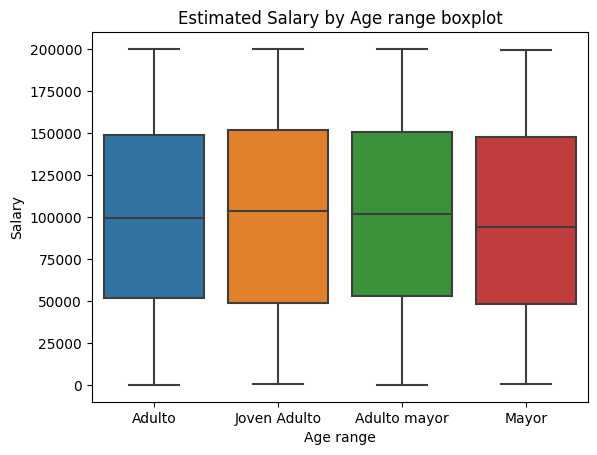

In [23]:
import seaborn as sns

# Crear un boxplot de la variable "EstimatedSalary" en función de la variable "Agerange"
expendbox = sns.boxplot(x="Agerange",
                        y="EstimatedSalary",
                        data=df)

# Establecer el título del gráfico y etiquetas
expendbox.set(xlabel='Age range', ylabel='Salary', title="Estimated Salary by Age range boxplot")


# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Estimated_Salary_by_Age_range_boxplot.jpg")

# Mostrar el gráfico
plt.show()

#### 🔸 Correlation Heatmap
En el mapa de correlación podemos ver las diferentes correlaciones entre las variables

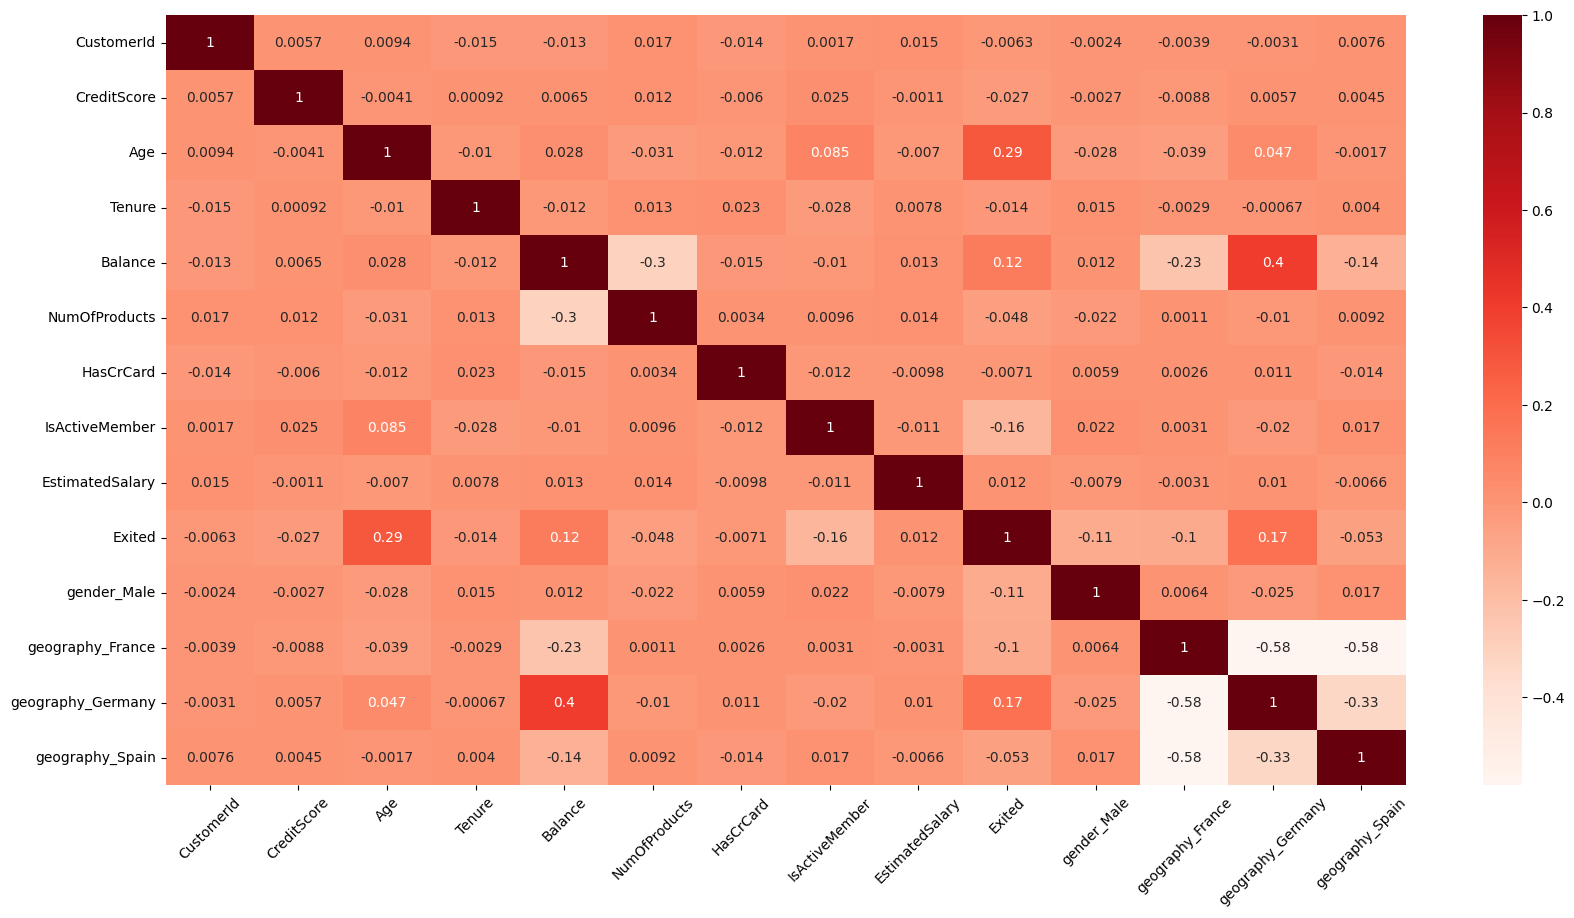

In [24]:
import seaborn as sns

# Calcula la matriz de correlación utilizando el DataFrame df
cor = df.corr()

# Crea una figura con un tamaño de 20x10 pulgadas
plt.figure(figsize=(20, 10))

# Crea un mapa de calor utilizando la matriz de correlación "cor"
heatmap = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

# Rota las etiquetas del eje x en un ángulo de 45 grados para facilitar su lectura
plt.xticks(rotation=45)

# Guardar el gráfico como una imagen (opcional)
# plt.savefig("Correlation_Heatmap.jpg")

# Mostrar el gráfico
plt.show()

## ⭕ **Classification**

#### ➖ Split data test and data train

In [25]:
# Aíslo la variable de interés y las variables independientes
X = df.drop(["Exited", "CustomerId"], axis=1) # Elimino las columnas "Exited" y "CustomerId" del DataFrame y asigno el resultado a X
X = X.select_dtypes(include=["int64", "float64", "uint8"])  # Selecciono las columnas de X que son de tipo int64, float64 o uint8
y = df["Exited"] # Asigno la columna "Exited" del DataFrame a la variable y

In [26]:
#Dividimos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=422)

#### ➖ Decision Tree Classifier

##### 🔸 Fit and evaluation with set random seed

In [27]:
# Importar el clasificador de Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

# Definir el clasificador de Árbol de Decisión
dt_clf = DecisionTreeClassifier(random_state=1)

# Ajustar el Árbol de Decisión utilizando los datos de entrenamiento
dt_clf.fit(X_train, y_train)

# Predecir las clases utilizando el Árbol de Decisión entrenado
y_pred = dt_clf.predict(X_test)

In [28]:
# Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2400
           1       0.49      0.54      0.51       599

    accuracy                           0.79      2999
   macro avg       0.68      0.70      0.69      2999
weighted avg       0.80      0.79      0.80      2999



##### 🔸 Fit and evaluation with cross validation

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score

# Define la función de puntuación para el recall y precision de la clase 1
recallscoring = make_scorer(recall_score, pos_label=1)
precisionscoring = make_scorer(precision_score, pos_label=1)

# Fit and evaluate
dt_clf = DecisionTreeClassifier(random_state=1)
recallscores=cross_val_score(dt_clf,X, y, cv=10, verbose=0, scoring=recallscoring)
precisionscores=cross_val_score(dt_clf,X, y, cv=10, verbose=0, scoring=precisionscoring)

print(f"Recall\n\tmedia: {np.mean(recallscores)} \n\tdesvio: {np.std(recallscores)}")
print(f"Precision\n\tmedia: {np.mean(precisionscores)} \n\tdesvio: {np.std(precisionscores)}")

Recall
	media: 0.5046484110885733 
	desvio: 0.045004262422979786
Precision
	media: 0.4913177019254572 
	desvio: 0.03628658471195457


##### 🔸 Tunning de hiperparámetros

In [46]:
# Ajuste de hiperparámetros
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.tree import DecisionTreeClassifier

# Definir la función de puntuación para recall de la clase 1
recallscoring = make_scorer(recall_score, pos_label=1)

# Crear una instancia del modelo de DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1)

# Defino la cuadrícula de parámetros a explorar
params_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'min_samples_split': [x for x in range(4, 21, 1)],
    'min_samples_leaf': [x for x in range(3, 20, 1)],
    'max_depth': [None, 1, 2, 3, 4],
}

# Crear una instancia de HalvingRandomSearchCV y ajustar el modelo
dt_hrandom_cv = HalvingRandomSearchCV(model, params_grid, scoring=recallscoring, factor=2)
dt_hrandom_cv.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados y la mejor puntuación en la validación cruzada
print("Mejores parámetros:", dt_hrandom_cv.best_params_)
print("Mejor puntuación en CV:", dt_hrandom_cv.best_score_)
print(dt_hrandom_cv.best_estimator_)

Mejores parámetros: {'splitter': 'best', 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_depth': None, 'criterion': 'log_loss'}
Mejor puntuación en CV: 0.5181124963455412
DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=9,
                       min_samples_split=11, random_state=1)


In [47]:
# Evaluación de los mejores estimadores utilizando recall y precision
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score

# Define la función de puntuación para el recall y precision de la clase 1
recallscoring = make_scorer(recall_score, pos_label=1)
precisionscoring = make_scorer(precision_score, pos_label=1)

# Cargo el modelo de Árbol de Decisión con los mejores estimadores
update_dt_clf = dt_hrandom_cv.best_estimator_

# Evaluación del modelo utilizando validación cruzada
recallscores = cross_val_score(update_dt_clf, X, y, cv=10, verbose=0, scoring=recallscoring)
precisionscores = cross_val_score(update_dt_clf, X, y, cv=10, verbose=0, scoring=precisionscoring)

# Imprimo los resultados de recall y precision
print(f"Recall\n\tmedia: {np.mean(recallscores)} \n\tdesvio: {np.std(recallscores)}")
print(f"Precision\n\tmedia: {np.mean(precisionscores)} \n\tdesvio: {np.std(precisionscores)}")

Recall
	media: 0.5129745001448855 
	desvio: 0.047362658726705725
Precision
	media: 0.6227991218523299 
	desvio: 0.023161276313371688


##### 🔸 Ajuste de threshold (umbral)

In [48]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

# Ajusto el modelo con los mejores parámetros
update_dt_clf.fit(X_train, y_train)

# Obtener las puntuaciones de probabilidad del modelo en el conjunto de prueba
y_scores = update_dt_clf.predict_proba(X_test)[:, 1]

# Recorro los posibles umbrales y los guardo
dict_thres = {
    'threshold': [],
    'precision': [],
    'recall': [],
    'true_positives': [],
    'true_negatives': [],
    'false_positives': [],
    'false_negatives': [],
    'true_positive_profit': [],
    'true_negative_profit': [],
    'false_positive_loss': [],
    'false_negative_loss': [],
    'net_profit': []
}

# Definimos costos y beneficios
campaign_cost = 50
lifetime_value = 500

# Iterar sobre los posibles valores de umbral
for value in range(0, 101, 5):
    threshold = value / 100  # Definir el umbral de clasificación deseado

    # Aplicar el umbral de clasificación
    y_pred = (y_scores >= threshold).astype(int)

    # Calcular métricas de evaluación
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)

    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calcular ganancias y pérdidas
    true_positive_profit = tp * lifetime_value / 2  # Ganancia neta por mantener un cliente
    true_negative_profit = tn * 0  # No hay ganancia por clasificar correctamente un negativo
    false_positive_loss = fp * campaign_cost  # Pérdida neta por gastar dinero en un cliente que se iba a quedar
    false_negative_loss = fn * lifetime_value / 2  # Pérdida por no hacer nada y que el cliente se vaya

    # Calcular ganancia neta
    net_profit = true_positive_profit + true_negative_profit - false_positive_loss - false_negative_loss

    # Guardar los resultados en el diccionario
    dict_thres['threshold'].append(threshold)
    dict_thres['precision'].append(precision)
    dict_thres['recall'].append(recall)
    dict_thres['true_positives'].append(tp)
    dict_thres['true_negatives'].append(tn)
    dict_thres['false_positives'].append(fp)
    dict_thres['false_negatives'].append(fn)
    dict_thres['true_positive_profit'].append(true_positive_profit)
    dict_thres['true_negative_profit'].append(true_negative_profit)
    dict_thres['false_positive_loss'].append(false_positive_loss)
    dict_thres['false_negative_loss'].append(false_negative_loss)
    dict_thres['net_profit'].append(net_profit)

# Crear un DataFrame con los resultados
df_thres_dt = pd.DataFrame(dict_thres)
df_thres_dt

,threshold,precision,recall,true_positives,true_negatives,false_positives,false_negatives,true_positive_profit,true_negative_profit,false_positive_loss,false_negative_loss,net_profit
0,0.00,0.199733,1.000000,599,0,2400,0,149750.0,0,120000,0.0,29750.0
1,0.05,0.349022,0.804674,482,1501,899,117,120500.0,0,44950,29250.0,46300.0
2,0.10,0.362442,0.782972,469,1575,825,130,117250.0,0,41250,32500.0,43500.0
3,0.15,0.403270,0.741235,444,1743,657,155,111000.0,0,32850,38750.0,39400.0
4,0.20,0.412653,0.729549,437,1778,622,162,109250.0,0,31100,40500.0,37650.0
5,0.25,0.447619,0.706177,423,1878,522,176,105750.0,0,26100,44000.0,35650.0
6,0.30,0.465438,0.674457,404,1936,464,195,101000.0,0,23200,48750.0,29050.0
7,0.35,0.500000,0.641068,384,2016,384,215,96000.0,0,19200,53750.0,23050.0
8,0.40,0.541420,0.611018,366,2090,310,233,91500.0,0,15500,58250.0,17750.0
9,0.45,0.610811,0.565943,339,2184,216,260,84750.0,0,10800,65000.0,8950.0


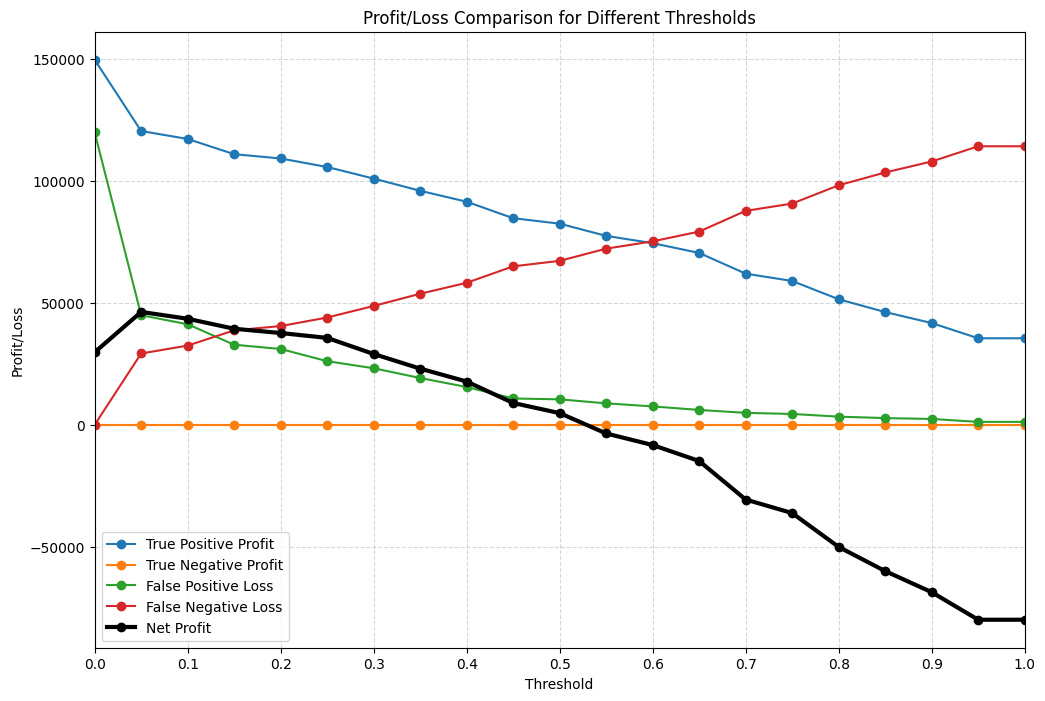

In [49]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar las ganancias y pérdidas
plt.plot(df_thres_dt['threshold'], df_thres_dt['true_positive_profit'], label='True Positive Profit', marker='o')
plt.plot(df_thres_dt['threshold'], df_thres_dt['true_negative_profit'], label='True Negative Profit', marker='o')
plt.plot(df_thres_dt['threshold'], df_thres_dt['false_positive_loss'], label='False Positive Loss', marker='o')
plt.plot(df_thres_dt['threshold'], df_thres_dt['false_negative_loss'], label='False Negative Loss', marker='o')

# Graficar las ganancias netas con un grosor de línea mayor y en color negro
plt.plot(df_thres_dt['threshold'], df_thres_dt['net_profit'], label='Net Profit', linewidth=3, color='black', marker='o')

# Configurar etiquetas de ejes y título del gráfico
plt.xlabel('Threshold')
plt.ylabel('Profit/Loss')
plt.title('Profit/Loss Comparison for Different Thresholds')

# Configurar la leyenda
plt.legend()

# Configurar límites y marcas del eje x
plt.xlim(0, 1)
plt.xticks([x/10 for x in range(0,11)])

# Agregar líneas de cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

#### ➖ Random Forest Classifier

##### 🔸 Fit and evaluation with set random seed

In [34]:
# Importar el clasificador de Bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# Definir el clasificador de Bosque aleatorio
rf_clf = RandomForestClassifier(random_state=1)

# Ajustar el Bosque aleatorio utilizando los datos de entrenamiento
rf_clf.fit(X_train, y_train)

# Predecir las clases utilizando el Bosque aleatorio entrenado
y_pred = rf_clf.predict(X_test)

In [35]:
# Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2400
           1       0.78      0.49      0.61       599

    accuracy                           0.87      2999
   macro avg       0.83      0.73      0.76      2999
weighted avg       0.86      0.87      0.86      2999



##### 🔸 Fit and evaluation with cross validation

In [36]:
# Importar RandomForestClassifier y otras dependencias necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score

# Definir la función de puntuación para recall y precision de la clase 1
recallscoring = make_scorer(recall_score, pos_label=1)
precisionscoring = make_scorer(precision_score, pos_label=1)

# Crear una instancia del clasificador Random Forest
rf_clf = RandomForestClassifier(random_state=1)

# Realizar la evaluación utilizando cross-validation
recallscores = cross_val_score(rf_clf, X, y, cv=10, verbose=0, scoring=recallscoring)
precisionscores = cross_val_score(rf_clf, X, y, cv=10, verbose=0, scoring=precisionscoring)

# Imprimir los resultados de recall y precision
print(f"Recall\n\tmedia: {np.mean(recallscores)} \n\tdesvio: {np.std(recallscores)}")
print(f"Precision\n\tmedia: {np.mean(precisionscores)} \n\tdesvio: {np.std(precisionscores)}")

Recall
	media: 0.4614676905244857 
	desvio: 0.036715954587056045
Precision
	media: 0.7718067013035108 
	desvio: 0.04081612296147838


##### 🔸 Tunning de hiperparámetros

In [37]:
# Ajuste de hiperparámetros
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier

# Definir la función de puntuación para recall de la clase 1
recallscoring = make_scorer(recall_score, pos_label=1)

# Crear una instancia del modelo de RandomForestClassifier
model = RandomForestClassifier()

# Definir los posibles valores de los hiperparámetros a ajustar
params_grid = {
    'n_estimators': [100, 150, 200],
    'criterion': ["gini", "entropy", "log_loss"],
    'min_samples_split': [x for x in range(4, 21, 1)],
    'min_samples_leaf': [x for x in range(3, 20, 1)],
    'max_depth': [None, 1, 2, 3],
}

# Crear una instancia de HalvingRandomSearchCV y ajustar el modelo
rf_hrandom_cv = HalvingRandomSearchCV(model, params_grid, scoring=recallscoring, factor=2)
rf_hrandom_cv.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados y la mejor puntuación en la validación cruzada
print("Mejores parámetros:", rf_hrandom_cv.best_params_)
print("Mejor puntuación en CV:", rf_hrandom_cv.best_score_)
print(rf_hrandom_cv.best_estimator_)

Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': None, 'criterion': 'gini'}
Mejor puntuación en CV: 0.44167956575485523
RandomForestClassifier(min_samples_leaf=3, min_samples_split=9,
                       n_estimators=200)


In [38]:
# Evaluación de los mejores estimadores utilizando recall y precision
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score

# Define la función de puntuación para el recall y precision de la clase 1
recallscoring = make_scorer(recall_score, pos_label=1)
precisionscoring = make_scorer(precision_score, pos_label=1)

# Cargo el modelo de Bosque aleatorio con los mejores estimadores
update_rf_clf = rf_hrandom_cv.best_estimator_

# Evaluación del modelo utilizando validación cruzada
recallscores=cross_val_score(update_rf_clf,X, y, cv=10, verbose=0, scoring=recallscoring)
precisionscores=cross_val_score(update_rf_clf,X, y, cv=10, verbose=0, scoring=precisionscoring)

# Imprimo los resultados de recall y precision
print(f"Recall\n\tmedia: {np.mean(recallscores)} \n\tdesvio: {np.std(recallscores)}")
print(f"Precision\n\tmedia: {np.mean(precisionscores)} \n\tdesvio: {np.std(precisionscores)}")

Recall
	media: 0.46147252004249983 
	desvio: 0.03941469816228011
Precision
	media: 0.7884025184052554 
	desvio: 0.03357156911235777


##### 🔸 Ajuste de threshold (umbral)

In [39]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

# Ajusto el modelo con los mejores parámetros
update_rf_clf.fit(X_train, y_train)

# Obtener las puntuaciones de probabilidad del modelo en el conjunto de prueba
y_scores = update_rf_clf.predict_proba(X_test)[:, 1]

# Recorro los posibles umbrales y los guardo
dict_thres = {
    'threshold': [],
    'precision': [],
    'recall': [],
    'true_positives': [],
    'true_negatives': [],
    'false_positives': [],
    'false_negatives': [],
    'true_positive_profit': [],
    'true_negative_profit': [],
    'false_positive_loss': [],
    'false_negative_loss': [],
    'net_profit': []
}

# Definimos costos y beneficios
campaign_cost = 50
lifetime_value = 500

# Iterar sobre los posibles valores de umbral
for value in range(0, 101, 5):
    threshold = value / 100  # Definir el umbral de clasificación deseado

    # Aplicar el umbral de clasificación
    y_pred = (y_scores >= threshold).astype(int)

    # Calcular métricas de evaluación
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)

    # Calcular la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calcular ganancias y pérdidas
    true_positive_profit = tp * lifetime_value / 2  # Ganancia neta por mantener un cliente
    true_negative_profit = tn * 0  # No hay ganancia por clasificar correctamente un negativo
    false_positive_loss = fp * campaign_cost  # Pérdida neta por gastar dinero en un cliente que se iba a quedar
    false_negative_loss = fn * lifetime_value / 2  # Pérdida por no hacer nada y que el cliente se vaya

    # Calcular ganancia neta
    net_profit = true_positive_profit + true_negative_profit - false_positive_loss - false_negative_loss

    # Guardar los resultados en el diccionario
    dict_thres['threshold'].append(threshold)
    dict_thres['precision'].append(precision)
    dict_thres['recall'].append(recall)
    dict_thres['true_positives'].append(tp)
    dict_thres['true_negatives'].append(tn)
    dict_thres['false_positives'].append(fp)
    dict_thres['false_negatives'].append(fn)
    dict_thres['true_positive_profit'].append(true_positive_profit)
    dict_thres['true_negative_profit'].append(true_negative_profit)
    dict_thres['false_positive_loss'].append(false_positive_loss)
    dict_thres['false_negative_loss'].append(false_negative_loss)
    dict_thres['net_profit'].append(net_profit)

# Crear un DataFrame con los resultados
df_thres_rf = pd.DataFrame(dict_thres)
df_thres_rf

,threshold,precision,recall,true_positives,true_negatives,false_positives,false_negatives,true_positive_profit,true_negative_profit,false_positive_loss,false_negative_loss,net_profit
0,0.00,0.199733,1.000000,599,0,2400,0,149750.0,0,120000,0.0,29750.0
1,0.05,0.256929,0.974958,584,711,1689,15,146000.0,0,84450,3750.0,57800.0
2,0.10,0.316035,0.904841,542,1227,1173,57,135500.0,0,58650,14250.0,62600.0
3,0.15,0.380917,0.846411,507,1576,824,92,126750.0,0,41200,23000.0,62550.0
4,0.20,0.450812,0.787980,472,1825,575,127,118000.0,0,28750,31750.0,57500.0
5,0.25,0.515716,0.739566,443,1984,416,156,110750.0,0,20800,39000.0,50950.0
6,0.30,0.599415,0.684474,410,2126,274,189,102500.0,0,13700,47250.0,41550.0
7,0.35,0.652705,0.624374,374,2201,199,225,93500.0,0,9950,56250.0,27300.0
8,0.40,0.700201,0.580968,348,2251,149,251,87000.0,0,7450,62750.0,16800.0
9,0.45,0.748815,0.527546,316,2294,106,283,79000.0,0,5300,70750.0,2950.0


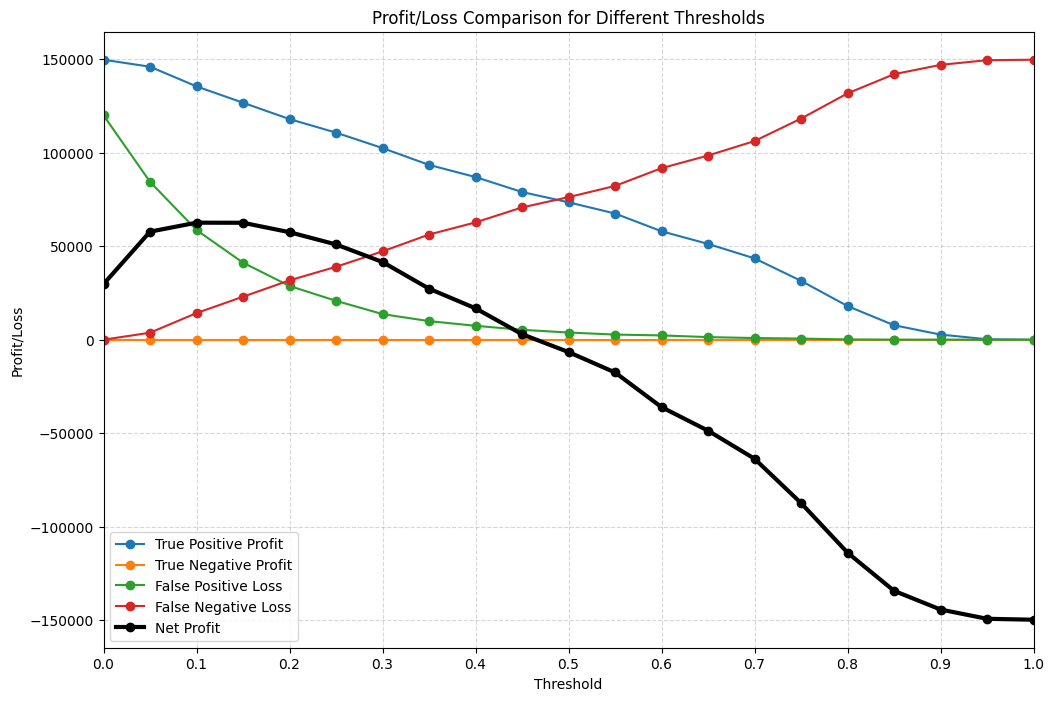

In [40]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Graficar las ganancias y pérdidas
plt.plot(df_thres_rf['threshold'], df_thres_rf['true_positive_profit'], label='True Positive Profit', marker='o')
plt.plot(df_thres_rf['threshold'], df_thres_rf['true_negative_profit'], label='True Negative Profit', marker='o')
plt.plot(df_thres_rf['threshold'], df_thres_rf['false_positive_loss'], label='False Positive Loss', marker='o')
plt.plot(df_thres_rf['threshold'], df_thres_rf['false_negative_loss'], label='False Negative Loss', marker='o')

# Graficar las ganancias netas con un grosor de línea mayor y en color negro
plt.plot(df_thres_rf['threshold'], df_thres_rf['net_profit'], label='Net Profit', linewidth=3, color='black', marker='o')

# Configurar etiquetas de ejes y título del gráfico
plt.xlabel('Threshold')
plt.ylabel('Profit/Loss')
plt.title('Profit/Loss Comparison for Different Thresholds')

# Configurar la leyenda
plt.legend()

# Configurar límites y marcas del eje x
plt.xlim(0, 1)
plt.xticks([x/10 for x in range(0,11)])

# Agregar líneas de cuadrícula
plt.grid(True, linestyle='--', alpha=0.5)

# Mostrar el gráfico
plt.show()

#### ➖ Comparación

##### 🔸 Comparación de Net Profit por Threshold

Comparamos el beneficio neto (net profit) para dos modelos diferentes (Decision Tree y Random Forest) en función del umbral de clasificación (threshold).

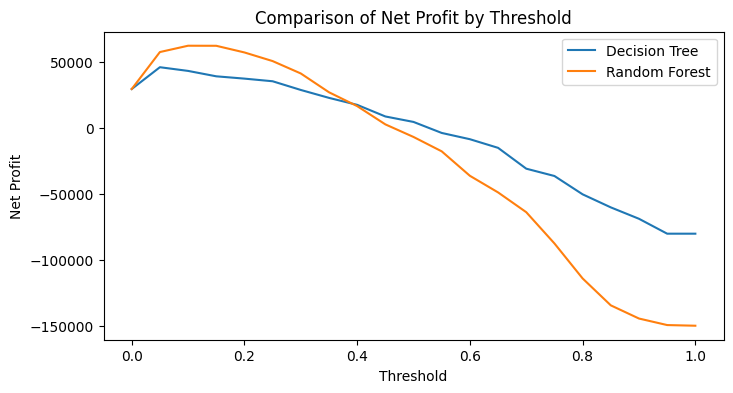

In [50]:
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 4))

# Gráfico para Decision Tree
plt.plot(df_thres_dt['threshold'], df_thres_dt['net_profit'], label='Decision Tree')

# Gráfico para Random Forest
plt.plot(df_thres_rf['threshold'], df_thres_rf['net_profit'], label='Random Forest')

# Configuración del gráfico
plt.xlabel('Threshold')
plt.ylabel('Net Profit')
plt.title('Comparison of Net Profit by Threshold')
plt.legend()

# Mostrar el gráfico
plt.show()

##### 🔸 Curva ROC y AUC

La curva ROC (Receiver Operating Characteristic) es una **representación gráfica utilizada para evaluar el rendimiento de un modelo de clasificación binaria**. Se compone de dos ejes: el eje X representa la tasa de falsos positivos (FPR) y el eje Y representa la tasa de verdaderos positivos (TPR) o sensibilidad.

La curva ROC muestra cómo varía la capacidad de discriminación del modelo a medida que se ajusta el umbral de clasificación. **Un modelo con un mejor rendimiento se acerca al punto (0,1) en la curva, lo que significa que tiene un bajo FPR y un alto TPR.**

La interpretación de la curva ROC se basa en el área bajo la curva (AUC). **Un AUC de 1 indica un modelo perfecto que puede distinguir perfectamente entre las clases.** Un AUC de 0.5 indica un rendimiento equivalente a una clasificación aleatoria, mientras que un AUC por encima de 0.5 indica un rendimiento mejor que el azar. Cuanto mayor sea el AUC, mejor será el rendimiento del modelo.

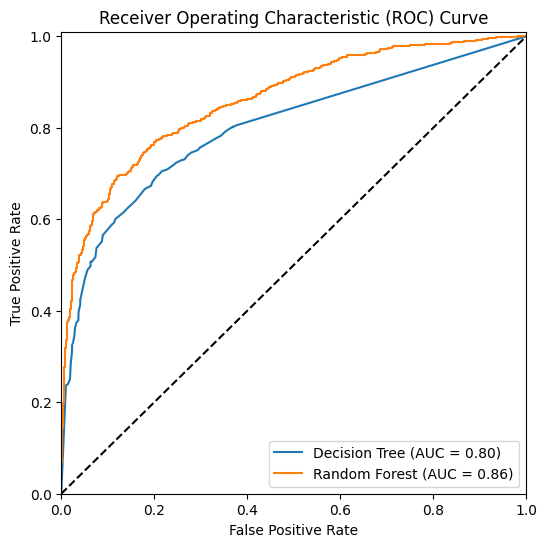

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Calcular la curva ROC para Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, update_dt_clf.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calcular la curva ROC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, update_rf_clf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()

##### 🔸 Importancia de características

En el caso de los modelos basados en árboles, como el Decision Tree y el Random Forest, se puede utilizar la métrica conocida como "importancia de características" (feature importance) para determinar el grado en que cada característica contribuye a la predicción realizada por el modelo.

En general, la importancia de las características se calcula en función de cómo se utilizan las características en los nodos del árbol durante el proceso de construcción y entrenamiento del modelo.

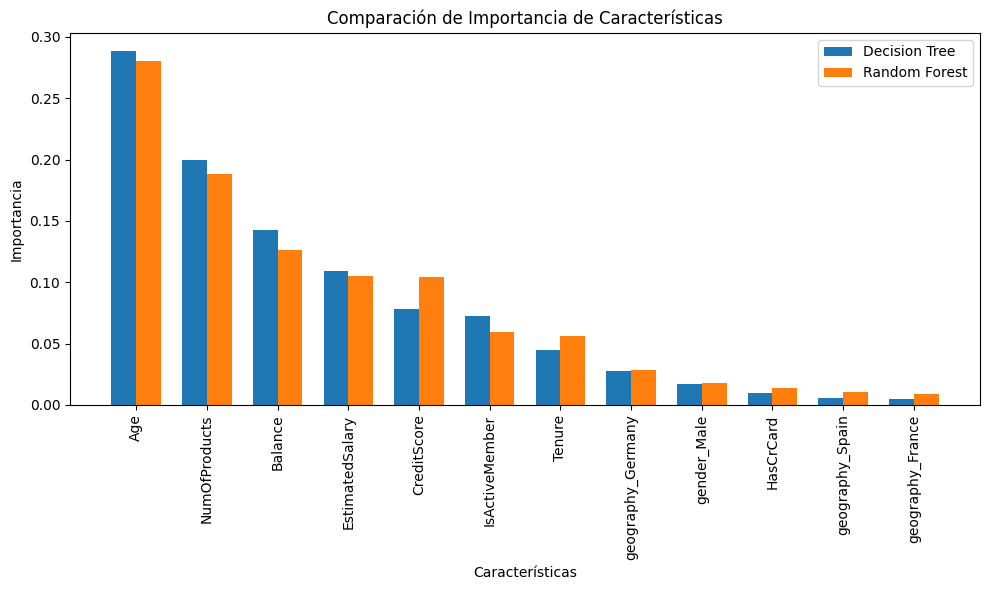

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Obtener la importancia de las características del Decision Tree
importances_dt = update_dt_clf.feature_importances_

# Obtener la importancia de las características del Random Forest
importances_rf = update_rf_clf.feature_importances_

# Obtener el nombre de las características
feature_names = X.columns

# Ordenar las importancias en orden descendente para el Decision Tree
indices_dt = np.argsort(importances_dt)[::-1]

# Ordenar las importancias en orden descendente para el Random Forest
indices_rf = np.argsort(importances_rf)[::-1]

# Configurar el ancho de las barras
bar_width = 0.35

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar la posición de las barras
bar_positions_dt = np.arange(len(importances_dt))
bar_positions_rf = bar_positions_dt + bar_width

# Graficar la importancia de las características para el Decision Tree
ax.bar(bar_positions_dt, importances_dt[indices_dt], bar_width, label='Decision Tree')

# Graficar la importancia de las características para el Random Forest
ax.bar(bar_positions_rf, importances_rf[indices_rf], bar_width, label='Random Forest')

# Configurar el eje x con el nombre de las características
ax.set_xticks(bar_positions_dt + bar_width / 2)
ax.set_xticklabels(feature_names[indices_dt], rotation='vertical')

# Configurar las etiquetas y título del gráfico
ax.set_xlabel('Características')
ax.set_ylabel('Importancia')
ax.set_title('Comparación de Importancia de Características')

# Mostrar la leyenda
ax.legend()

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()